In [1]:
# install required libraries
%pip install -r requirements.txt


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from pathlib import Path
from model import DecisionTree, RandomForest, CatBoost 
from pos_feature_extractor import POSFeatures
from bow_feature_extractor import BOWFeatures
from word_feature_extractor import WordFeatures
from char_feature_extractor import CharFeatures
from bigram_feature_extractor import BigramFeatures
from copy import deepcopy
from pipeline import evaluate_on_dev, evaluate_on_train_test

In [3]:
data_folder_name = 'A4data_2526_pan2020'
DATA_FOLDER = Path(data_folder_name)
DEV_SET = None
TEST_SET = None
TRAIN_SET = None

if not DATA_FOLDER.exists():
    print(f"ERROR: Data folder not found, make sure the '/{data_folder_name}' folder is located in the same folder as this notebook!")
else:
    try:
        DEV_SET = pd.read_csv(DATA_FOLDER / 'pan2526_dev_data.csv')
        TEST_SET = pd.read_csv(DATA_FOLDER / 'pan2526_test_data.csv')
        TRAIN_SET = pd.read_csv(DATA_FOLDER / 'pan2526_train_data.csv')
        print('Data loaded successfully')
    except FileNotFoundError:
        print(f"ERROR: Data not found in '/{DATA_FOLDER}'")
    

Data loaded successfully


In [4]:
model_dict = {
        DecisionTree: {},
        RandomForest: {
            'n_estimators': 100
        },
        CatBoost: {
            'iterations': 300,
            'learning_rate': 0.05,
            'depth':6,
            'loss_function':'MultiClass',
            'verbose': 500
        }
    }

In [5]:
feature_dict = {
    POSFeatures: {
        'ablate_individual_features': True,
        'feature_names': []
    },
    BOWFeatures: {
        'ablate_individual_features': True,
        'feature_names': []
    },
    WordFeatures: {
        'ablate_individual_features': True,
        'feature_names': []   
    },
    CharFeatures: {
        'ablate_individual_features': True,
        'feature_names': []   
    },
    BigramFeatures: {
        'ablate_individual_features': False,
        'feature_names': []   
    }
}


Extracting features for X_train: ...
Extracting features for X_test: ...
Training and testing 3 models
0:	learn: 2.9741537	total: 128ms	remaining: 38.3s
299:	learn: 0.6220681	total: 9.13s	remaining: 0us
0:	learn: 2.9752895	total: 39.2ms	remaining: 11.7s
299:	learn: 0.7051995	total: 8.71s	remaining: 0us
0:	learn: 2.9756303	total: 29.2ms	remaining: 8.74s
299:	learn: 0.6188441	total: 9.11s	remaining: 0us
0:	learn: 2.9764093	total: 22.6ms	remaining: 6.74s
299:	learn: 0.6015683	total: 8.85s	remaining: 0us
0:	learn: 2.9756303	total: 42.5ms	remaining: 12.7s
299:	learn: 0.6217165	total: 9.09s	remaining: 0us
0:	learn: 2.9756303	total: 62.2ms	remaining: 18.6s
299:	learn: 0.6388755	total: 9.31s	remaining: 0us
0:	learn: 2.9748604	total: 45.2ms	remaining: 13.5s
299:	learn: 0.6211800	total: 8.98s	remaining: 0us
0:	learn: 2.9748604	total: 48.7ms	remaining: 14.6s
299:	learn: 0.6496671	total: 9.65s	remaining: 0us
0:	learn: 2.9748604	total: 34.4ms	remaining: 10.3s
299:	learn: 0.6316906	total: 8.54s	rema

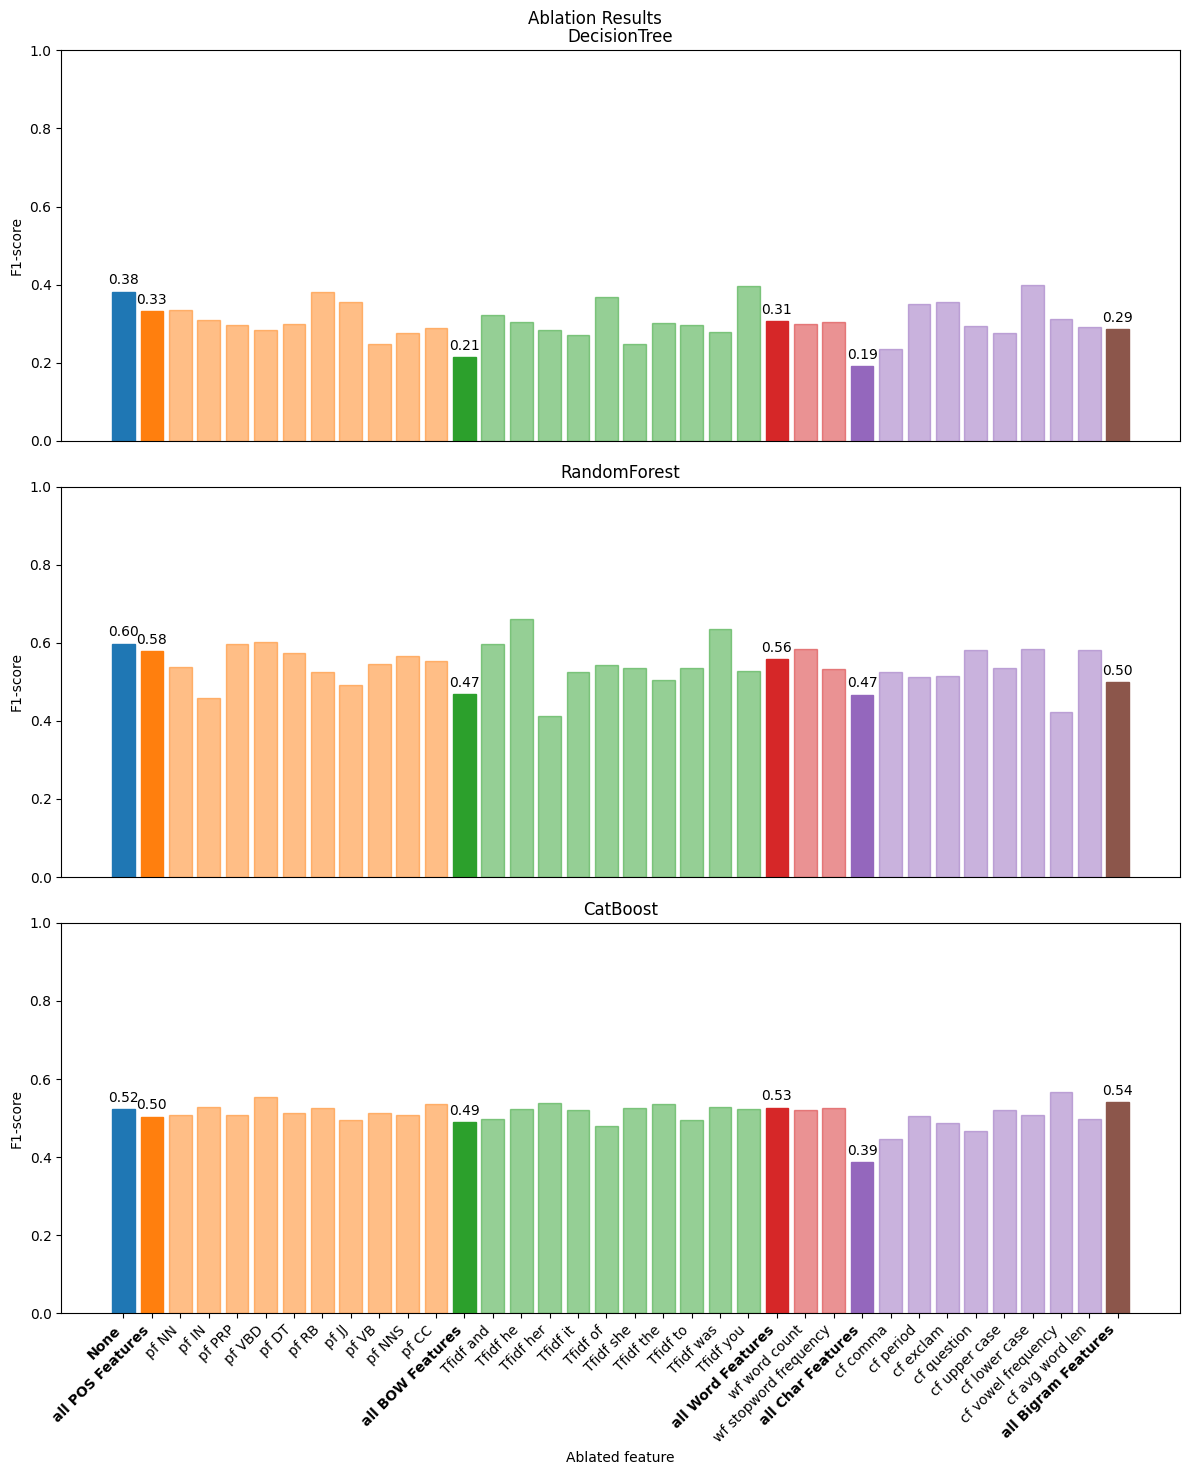

In [6]:
evaluate_on_dev(
    dev_set = DEV_SET.copy(deep=True),
    feature_dict = deepcopy(feature_dict),
    model_dict = deepcopy(model_dict)
)

Extracting features for X_train: ...
Extracting features for X_test: ...
Training and testing 3 models
0:	learn: 2.9238605	total: 51.4ms	remaining: 15.4s
299:	learn: 0.7053674	total: 15.4s	remaining: 0us
0:	learn: 2.9417103	total: 59.5ms	remaining: 17.8s
299:	learn: 0.8044293	total: 14.3s	remaining: 0us
0:	learn: 2.9366483	total: 49ms	remaining: 14.7s
299:	learn: 0.7112914	total: 16.3s	remaining: 0us
0:	learn: 2.9366483	total: 57.7ms	remaining: 17.2s
299:	learn: 0.7186488	total: 15.8s	remaining: 0us
0:	learn: 2.9427607	total: 54.8ms	remaining: 16.4s
299:	learn: 0.7003165	total: 15.7s	remaining: 0us
0:	learn: 2.9328860	total: 50.5ms	remaining: 15.1s
299:	learn: 0.7171855	total: 15.8s	remaining: 0us
0:	learn: 2.9259287	total: 53.1ms	remaining: 15.9s
299:	learn: 0.7025121	total: 15.8s	remaining: 0us
0:	learn: 2.9259287	total: 60.8ms	remaining: 18.2s
299:	learn: 0.7232537	total: 15.6s	remaining: 0us
0:	learn: 2.9259287	total: 52.9ms	remaining: 15.8s
299:	learn: 0.6966818	total: 15.3s	remai

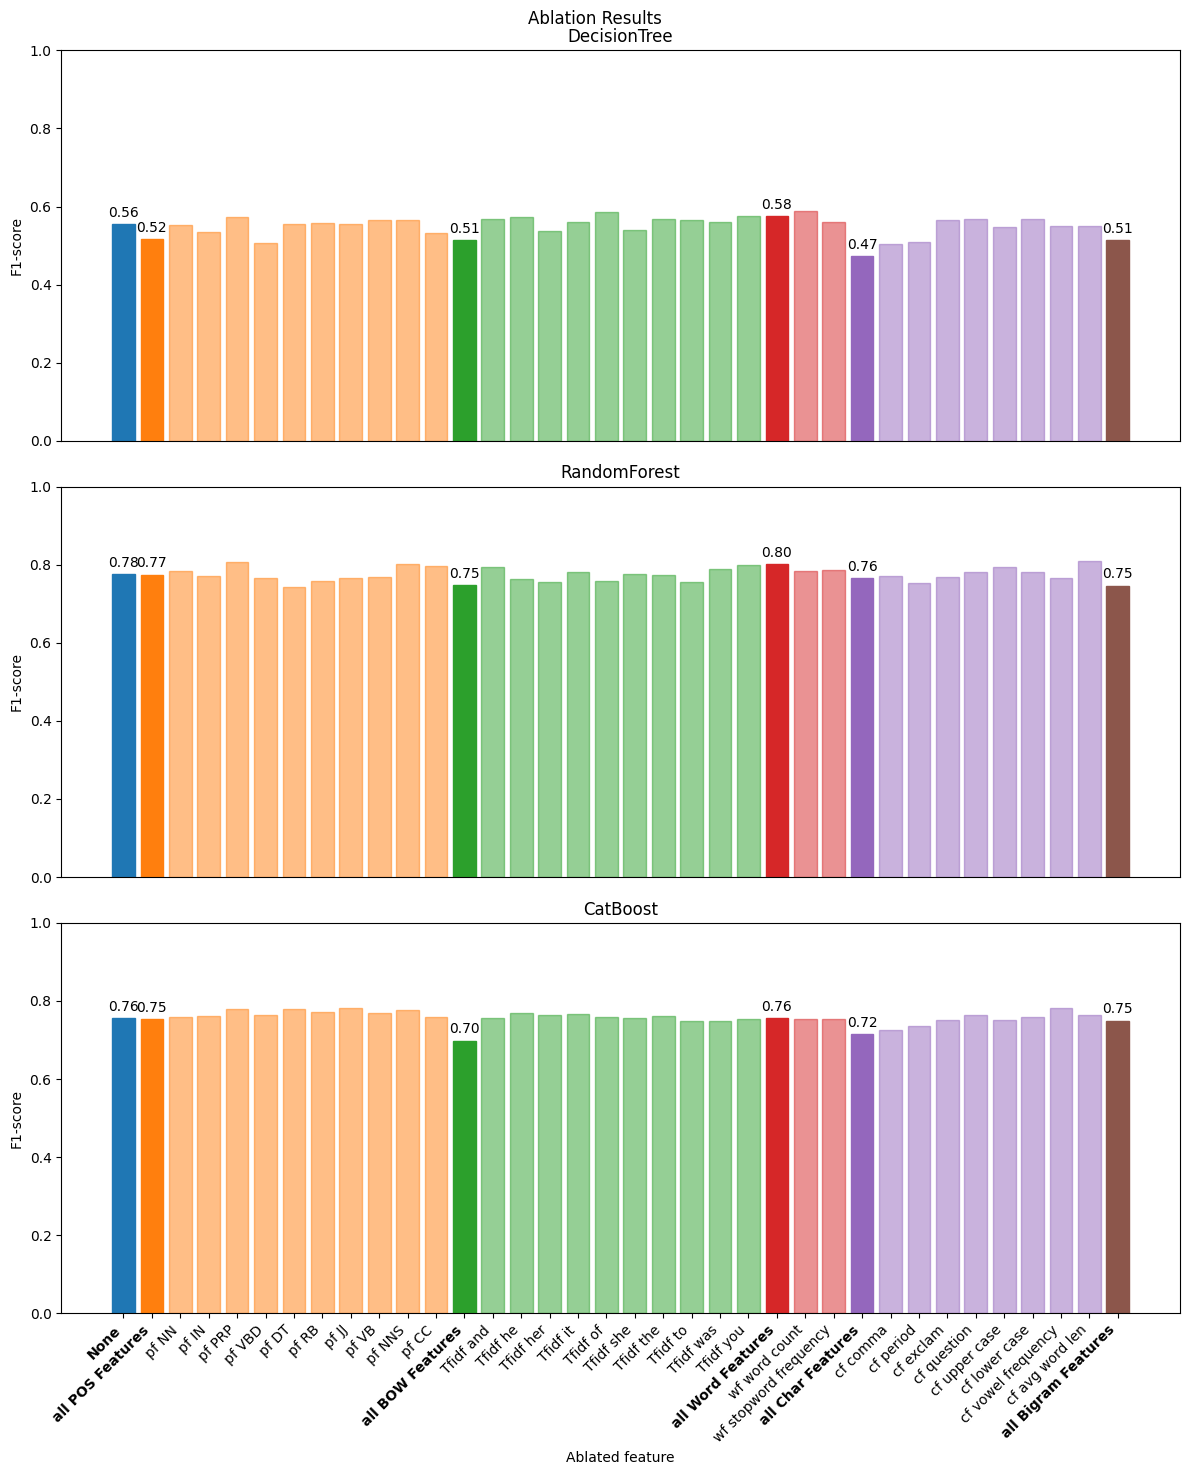

In [7]:
evaluate_on_train_test(
    train_set=TRAIN_SET.copy(deep=True),
    test_set=TEST_SET.copy(deep=True),
    feature_dict=deepcopy(feature_dict),
    model_dict=deepcopy(model_dict)
)